# Import Packages

In [58]:
import sys  # Read system parameters.

import matplotlib as mpl  # Create 2D charts.
import matplotlib.pyplot as plt
import numpy as np  # Work with multi-dimensional arrays and matrices.
import pandas as pd  # Manipulate and analyze data.
import seaborn as sb  # Perform data visualization.
import sklearn  # Perform data mining and analysis.
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from scipy.stats import zscore

# Print summary
print("Libraries used in this project:")
print("- Python {}".format(sys.version))
print("- NumPy {}".format(np.__version__))
print("- pandas {}".format(pd.__version__))
print("- Matplotlib {}".format(mpl.__version__))
print("- scikit-learn {}\n".format(sklearn.__version__))

Libraries used in this project:
- Python 3.9.20 (main, Oct  3 2024, 02:27:54) 
[Clang 14.0.6 ]
- NumPy 1.22.3
- pandas 1.4.1
- Matplotlib 3.8.4
- scikit-learn 1.2.2



In [59]:
wheat = pd.read_csv(
    "https://raw.githubusercontent.com/tyrantdavis/datasets/refs/heads/main/wheat_seeds.csv",
    header=None,
    delimiter=",",
    names=[
        "Area",
        "Perimeter",
        "Compactness",
        "Length_of_kernel",
        "Width_of_kernel",
        "Asymmetry_coefficient",
        "Length_of_kernel_groove",
        "Class(123)",
    ],
)
df = wheat.copy()

### View sample data

In [60]:
df.head()

,Area,Perimeter,Compactness,Length_of_kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove,Class(123)
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## Explore the Dataset

#### Count total NaN or missing values for each column in a DataFrame

The next step checks for Nan and Null or missing values. This may be considered somewhat repetitive since the details are already included in the output of the .info() command. Nevertheless, there is no disadvantage in being thoroughly comprehensive.

In [61]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Area                       0
Perimeter                  0
Compactness                0
Length_of_kernel           0
Width_of_kernel            0
Asymmetry_coefficient      0
Length_of_kernel_groove    0
Class(123)                 0
dtype: int64


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length_of_kernel         210 non-null    float64
 4   Width_of_kernel          210 non-null    float64
 5   Asymmetry_coefficient    210 non-null    float64
 6   Length_of_kernel_groove  210 non-null    float64
 7   Class(123)               210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


### Check the data types and look for any missing entries.

**Spotlights** 

- The dataset consists of 210 entries and 5 attributes.
- All attributes are float numbers, except for the target attribute, which consists of integers. This target attribute indicates the seeds species that the model is expected to predict, categorized as 1, 2, or 3.
  
The labels for each species are defined as follows:
- Kama is labeled as 1.
- Rosa is labeled as 2.
- Canadian is labeled as 3.

- There are no missing values; every entry is complete with data in all attributes.
- The attributes provide various characteristics that aid in the classification of each specimen.

In [63]:
target_classes = df["Class(123)"].value_counts()

target_classes_list = target_classes.to_list()
print("Kama (Class 1):", target_classes_list[0], "\n")
print("Rosa (Class 2):", target_classes_list[1], "\n")
print("Besni (Class 3):", target_classes_list[2], "\n")


Kama (Class 1): 70 

Rosa (Class 2): 70 

Besni (Class 3): 70 



### Rename target column 'Class' 

In [64]:
df.rename(columns={"Class(123)": "target"}, inplace=True)
df.head()

,Area,Perimeter,Compactness,Length_of_kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


<Axes: title={'center': 'Count (target)'}>

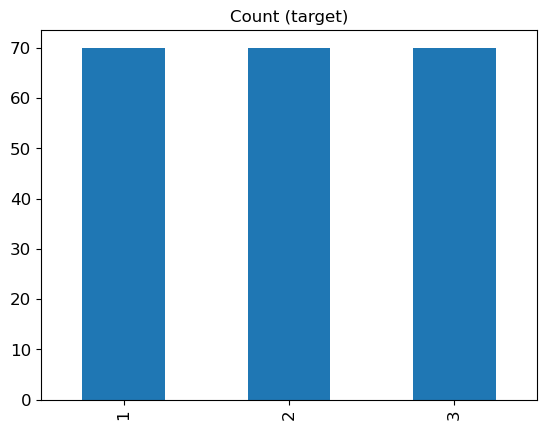

In [65]:
target_classes.plot(kind="bar", title="Count (target)", grid=False)

**Spotlights** 

The distribution of outcomes in this dataset is notably symmetrical, with both classes occurring at equal frequencies. This characteristic positions it as an excellent candidate for implementation within a Support Vector Machine (SVM) model, distinguishing it from many datasets typically found in practical applications.

In [66]:
data = df.drop(columns="target", axis=1)

## Examine Summary Statistics

In [67]:
with pd.option_context("float_format", "{:.2f}".format):
    print(df.describe())

        Area  Perimeter  Compactness  Length_of_kernel  Width_of_kernel  \
count 210.00     210.00       210.00            210.00           210.00   
mean   14.85      14.56         0.87              5.63             3.26   
std     2.91       1.31         0.02              0.44             0.38   
min    10.59      12.41         0.81              4.90             2.63   
25%    12.27      13.45         0.86              5.26             2.94   
50%    14.36      14.32         0.87              5.52             3.24   
75%    17.30      15.71         0.89              5.98             3.56   
max    21.18      17.25         0.92              6.67             4.03   

       Asymmetry_coefficient  Length_of_kernel_groove  target  
count                 210.00                   210.00  210.00  
mean                    3.70                     5.41    2.00  
std                     1.50                     0.49    0.82  
min                     0.77                     4.52    1.00  
25% 

**Spotlights**

- The dataset is quite straightforward and generally tidy, requiring minimal feature engineering.
- There might be a handful of outliers that could affect the performance of a classification model.

In [68]:
reordered = [
        "target",
        "Asymmetry_coefficient",
        "Compactness",
        "Width_of_kernel",
        "Area",
        "Perimeter",
        "Length_of_kernel",
        "Length_of_kernel_groove",]
df[reordered].corr()

,target,Asymmetry_coefficient,Compactness,Width_of_kernel,Area,Perimeter,Length_of_kernel,Length_of_kernel_groove
target,1.000000,0.577273,-0.531007,-0.423463,-0.346058,-0.327900,-0.257269,0.024301
Asymmetry_coefficient,0.577273,1.000000,-0.331471,-0.258037,-0.229572,-0.217340,-0.171562,-0.011079
Compactness,-0.531007,-0.331471,1.000000,0.761635,0.608288,0.529244,0.367915,0.226825
Width_of_kernel,-0.423463,-0.258037,0.761635,1.000000,0.970771,0.944829,0.860415,0.749131
Area,-0.346058,-0.229572,0.608288,0.970771,1.000000,0.994341,0.949985,0.863693
Perimeter,-0.327900,-0.217340,0.529244,0.944829,0.994341,1.000000,0.972422,0.890784
Length_of_kernel,-0.257269,-0.171562,0.367915,0.860415,0.949985,0.972422,1.000000,0.932806
Length_of_kernel_groove,0.024301,-0.011079,0.226825,0.749131,0.863693,0.890784,0.932806,1.000000


**Spotlights**

- The asymmetry coefficient exhibits the most significant correlation with the target variable, approximately 58%.

In [ ]:
reordered = [
        "Asymmetry_coefficient",
        "Compactness",
        "Width_of_kernel",
        "Area",
        "Perimeter",
        "Length_of_kernel",
        "Length_of_kernel_groove"
]

<Axes: title={'center': 'All Correlations'}>

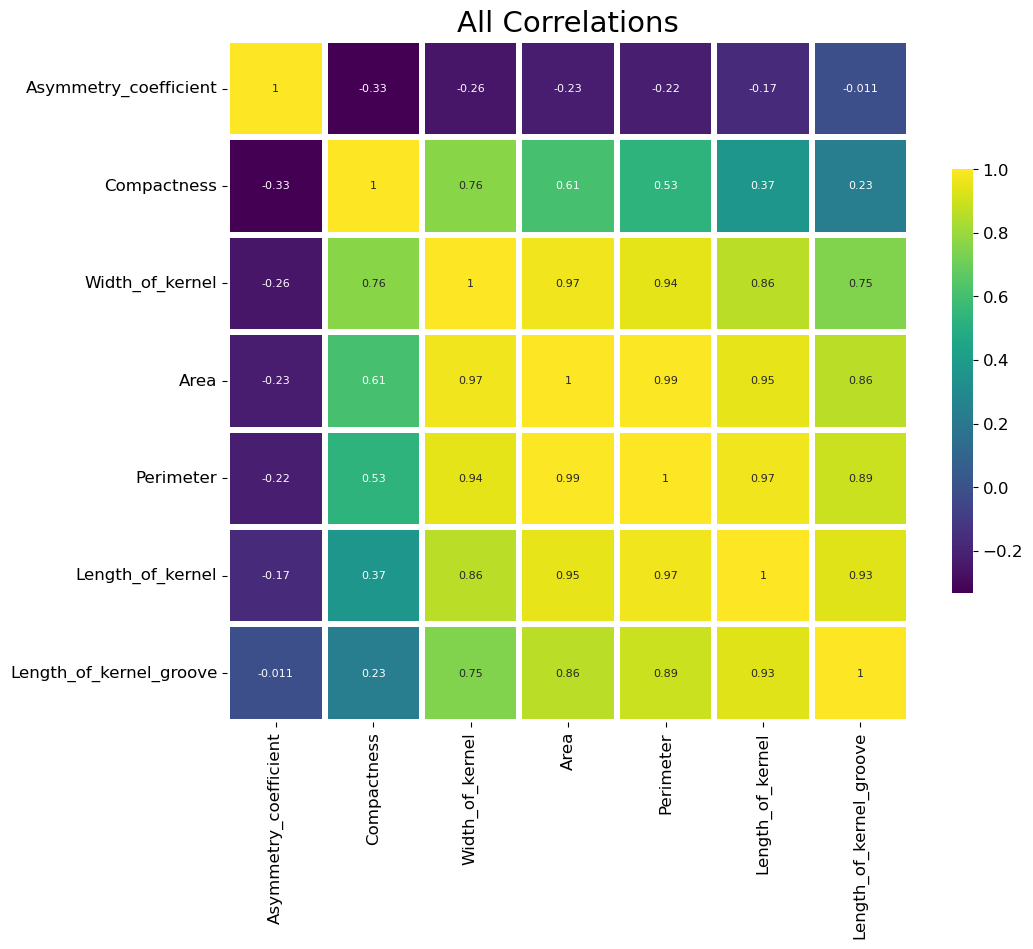

In [70]:
"""Specify size and title for visualization"""
f, axes = plt.subplots(figsize=(11, 11))
plt.title("All Correlations", fontsize=21)

"""Use Seaborn to plot the correlation matrix as a hetamap"""
sb.heatmap(
    df[reordered].corr(),
    linewidths=3.0,
    square=True,
    cmap="viridis",
    linecolor="w",
    annot=True,
    annot_kws={"size": 8},
    cbar_kws={"shrink": 0.5},
)

**Spotlights**

- The features Width_of_kernel, Area, Perimeter, and Length_of_kernel exhibit a strong correlation with one another. Therefore, it would be beneficial to eliminate all but one of these highly correlated attributes. The Width_of_kernel will be retained due to having the strongest correlation with the target variable.

### Graph Figures

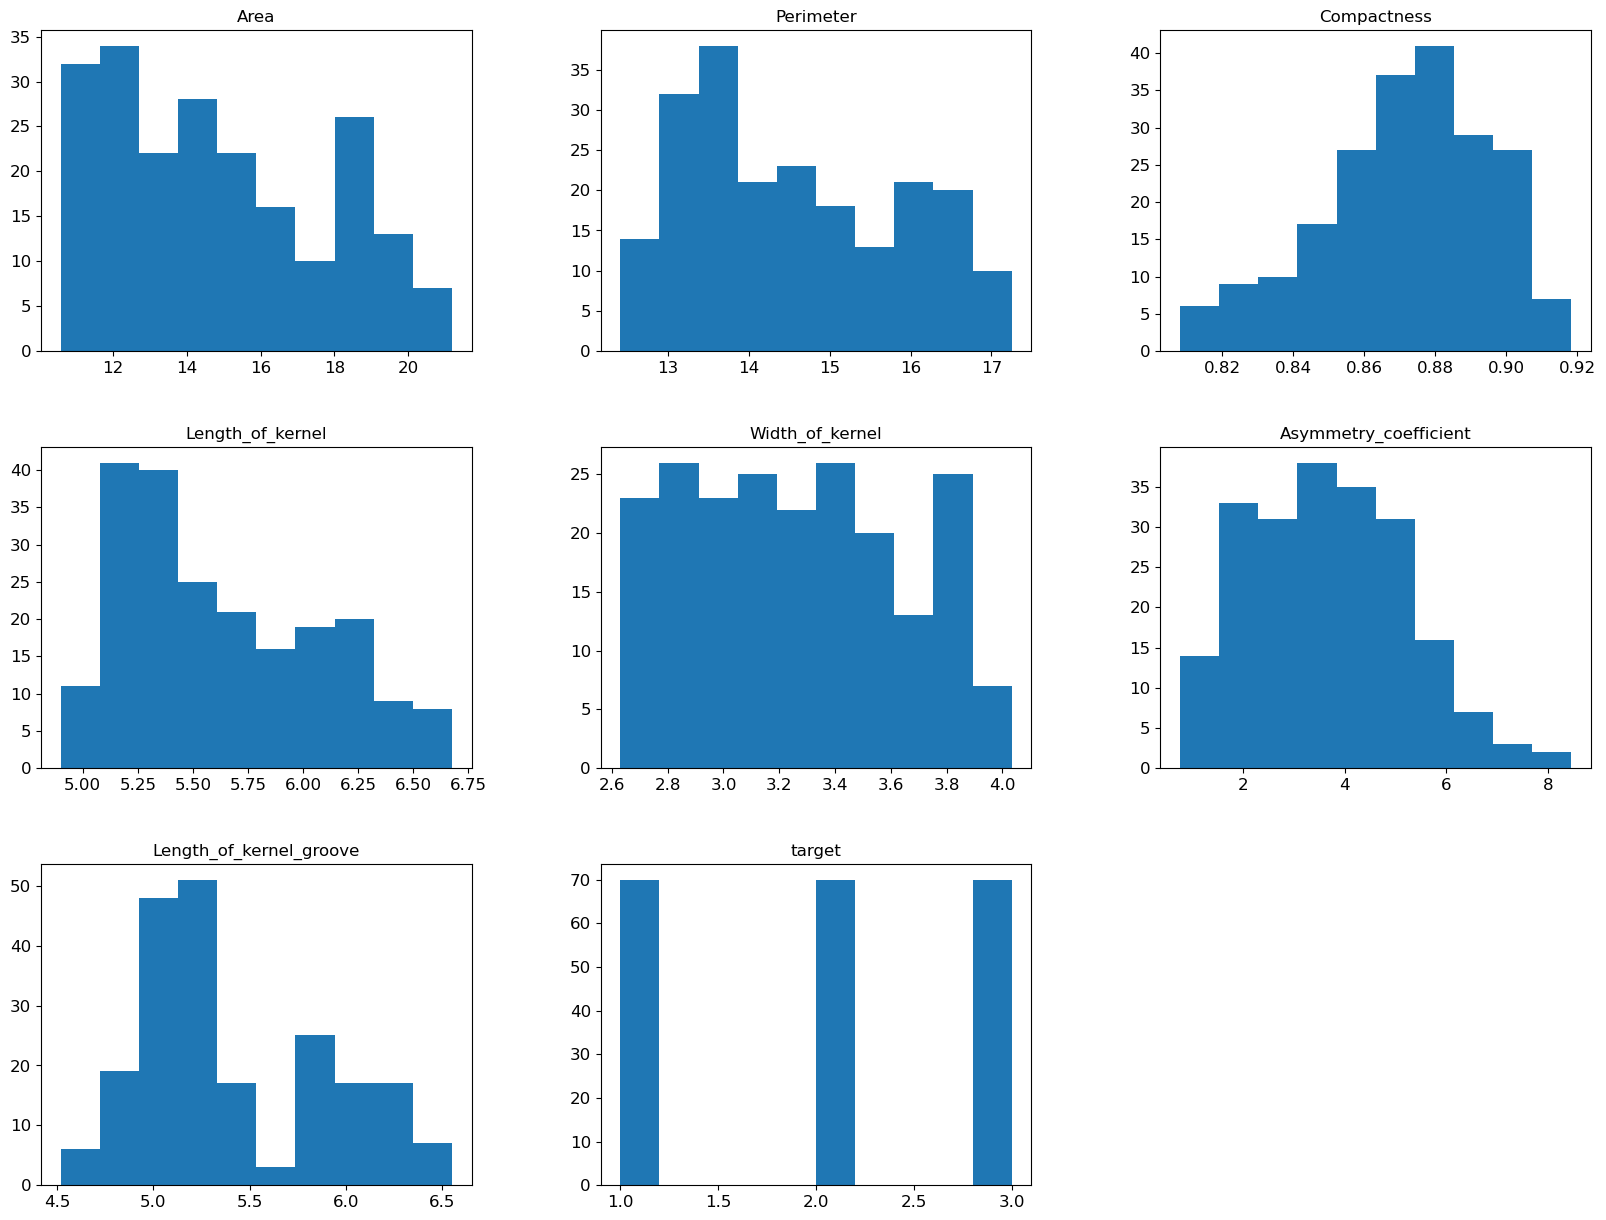

<Figure size 640x480 with 0 Axes>

In [71]:
%matplotlib inline
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

df.hist(figsize=(20, 15), grid=False)
plt.figure();

**Spotlights**

- The dataset is relatively simple and well-organized, necessitating only a limited amount of feature engineering.
- A few outliers may exist that could potentially impact the effectiveness of a classification model.
- In general, the dataset's straightforward nature facilitates ease of use, although it remains crucial to monitor outliers.
- Additionally, the distribution of class labels (target) is balanced as discussed earlier. 

## Drop Highly Correlated Features

When features exhibit a high degree of correlation, a phenomenon known as multicollinearity arises, complicating the ability of the Support Vector Machine (SVM), which will be implemented later, to ascertain the distinct impact of each feature on the prediction. This situation results in coefficient estimates that may be deemed unreliable.

The next step removes the 'Area', 'Perimeter', and the 'Length_of_kernel' features. 

In [72]:
df.drop(columns=["Area", "Perimeter", "Length_of_kernel"], inplace=True)

## Detect Outliers

The subsequent phase involves analyzing a boxplot that illustrates the mean characteristics, as indicated by a predictors array, to detect and remove any noticeable outliers. Support Vector Machines are particularly sensitive to outliers, making it crucial to address any significantly impactful outliers before developing the model.

Considering that the a few features do not adhere to a normal distribution, it is more beneficial to evaluate the boxplot of the log-transformed z-scores.

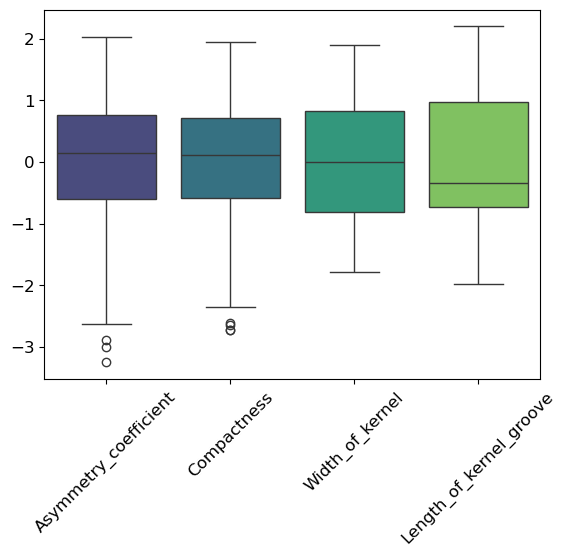

In [73]:
features = [
        "Asymmetry_coefficient",
        "Compactness",
        "Width_of_kernel",
        "Length_of_kernel_groove",]

sb.boxplot(data=np.log(df[features] + 0.01).apply(zscore),palette="viridis")
plt.xticks(rotation=45)
plt.show()
plt.close()


**Spotlights** 

It seems that there are a handful of unusual values when it comes to Compactness and Asymmetry_coefficient. These outliers stand out from the rest of the data, indicating that they may not fit the typical pattern observed. Identifying these anomalies can be quite helpful in understanding the overall distribution and characteristics of Compactness and Asymmetry_coefficient in the dataset.

## Split the Label From the Dataset

In [74]:
"""Split the training and test datasets and their labels"""
X = df.drop("target", axis=1)
y = df.target

## Compare Shape of Original Dataset to Training and Test Sets.

In [75]:
"""Compare the number of rows and columns in the original data to the training and test sets"""
print("Original data shape:", df.shape)
print("X shape (features):", X.shape)
print("y shape (target):", y.shape)

Original data shape: (210, 5)
X shape (features): (210, 4)
y shape (target): (210,)


# Decrease the Dataset's Dimensionality

Initially, the focus will be on just two of the seven features, specifically 'Area' and 'Perimeter', while examining only two of the three seed species, which are Kama and Rosa. The complete dataset will eventually be used too train the model as progress is made.

In [76]:
"""To focus on the analysis, only  the last two characteristics: 'Area' and 'Perimeter' will be consider."""
data = X.copy()
examined_features = pd.DataFrame(data.iloc[:, -2:])
label = y.copy()

print("\nBefore reduction:")
print("Features dataset dimensions are", examined_features.shape)
print("Label dataset dimensions are", label.shape)

"""Restrict your labels to just two options: 0 for Kama and 1 for Rosa, when categorizing."""
labels = (label == 1) | (label == 2)
examined_features = examined_features[labels]
label = label[labels]

print("\nAfter reduction:")
print("examined_features dataset dimensions are", examined_features.shape)
print("Label dataset dimensions are", label.shape)


Before reduction:
Features dataset dimensions are (210, 2)
Label dataset dimensions are (210,)

After reduction:
examined_features dataset dimensions are (140, 2)
Label dataset dimensions are (140,)


# Evaluate Class Separation

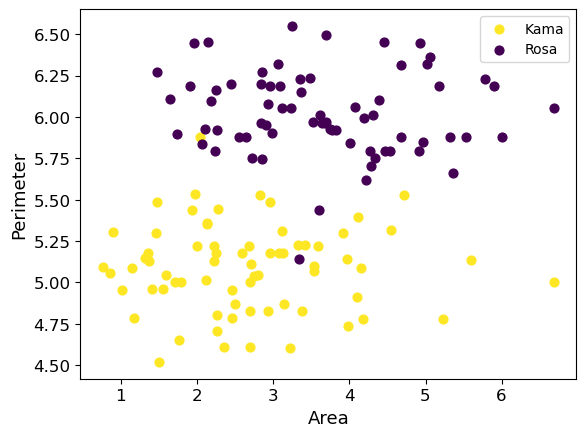

In [77]:
"""The x-axis = Sepal length, the y-axis = sepal width."""

feature_scatter = np.array(examined_features)[:, 0]
label_scatter = np.array(examined_features)[:, 1]
feature_scatter
cdict = {1: "#fde725", 2: "#440154"}

"""Generate scatter plot with legend"""
for color_label in np.unique(label):
    if color_label == 1:
        seed = "Kama"
    if color_label == 2:
        seed = "Rosa"

    ix = np.where(label == color_label)
    plt.scatter(
        feature_scatter[ix], label_scatter[ix], c=cdict[color_label], label=seed, s=40
    )

plt.legend()
plt.xlabel("Area", fontsize=13)
plt.ylabel("Perimeter", fontsize=13)
plt.annotate(
    "Possible outlier",
    xy=(4.4, 2.3),
    xytext=(2.9, 2.2),
    arrowprops=dict(color="black"), # green
    fontsize=15,
);

**Spotlights**

Here is a simple scatter plot showcasing the two features we extracted earlier: Area and Perimeter.

- The purple dots located in the upper left represent the data points for Kama seeds.
- The yellow dots found in the lower right indicate the data points for Rosa seeds.
- Overall, it appears that these two features can be fairly well separated by a straight decision boundary.
- There are four instances that are misclassified which are surely the results of outliers in the dataset as discussed previously.

### Graph the Decision Boundary for a Specified Model

In [78]:
def graph_decision_boundary(X, y, model, is_svm):

    features_scatter = np.array(X)[:, 0]
    label_scatter = np.array(X)[:, 1]

    cdict = {1: "#fde725", 2: "#440154"}

    for color_label in np.unique(y):
        if color_label == 1:
            seed = "Kama"
        if color_label == 2:
            seed = "Rosa"

        ix = np.where(y == color_label)
        plt.scatter(
            features_scatter[ix],
            label_scatter[ix],
            c=cdict[color_label],
            label=seed,
            s=40,
        )

    plt.legend()
    plt.xlabel("Area", fontsize=13)
    plt.ylabel("Perimeter", fontsize=13)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    """Generate the grid."""
    xx = np.linspace(xlim[0], xlim[1], 40)
    yy = np.linspace(ylim[0], ylim[1], 40)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    """Utilize the model's decision function to visualize the boundary."""
    Z = model.decision_function(xy).reshape(XX.shape)

    if is_svm == True:
        """Create a plot for the decision boundary along with the margins."""
        ax.contour(
            XX, YY, Z, colors="r", levels=[-1, 0, 1], linestyles=["--", "-", "--"]
        )

        """Graph the support vectors."""
        ax.scatter(
            model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=100,
            linewidth=1,
            facecolors="none",
            edgecolors="k",
        )
    else:
        ax.contour(XX, YY, Z, colors="r", levels=[0], linestyles=["-"])

    plt.show()


print("A function for plotting the decision boundary has been established.")

A function for plotting the decision boundary has been established.


### Develop a Fundamental Logistic Regression Model and Illustrate its Decision Boundary.

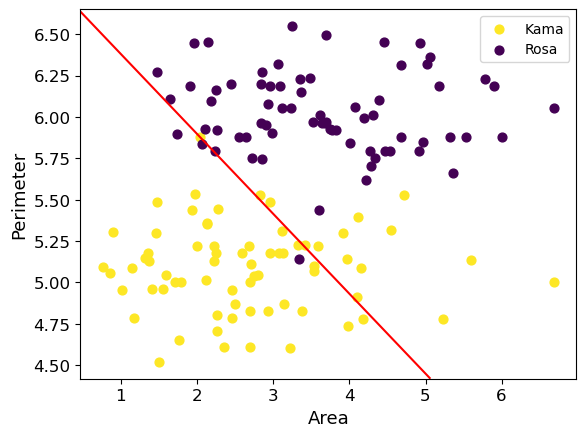

In [79]:
log_reg = LogisticRegression(solver="liblinear", random_state=1936)
log_reg.fit(examined_features.values, label.values)

graph_decision_boundary(examined_features, label, log_reg, False)

**Spotlights** 

The decision boundary typically performs inadequately in distinguishing between the classes. A distinct separation exists between the two classes, with the intervening space creating a line that the boundary does not effectively generalize. This may indicate a potential issue of underfitting. Furthermore, there has been an increase in the number of instances that were previously misclassified.

####  Train a Support Vector Machine (SVM) Model and Display its Decision Boundary Along with Margins.

The SVC() class is designed for support-vector classification. In this scenario, two hyperparameters are being configured.

- The kernel defines the method that will be used, and for this instance, it is a matter of kick things off with a linear kernel.
- C represents the regularization penalty, which influences how wide the margins are. A larger penalty results in tighter margins. A relatively high value of 100 will be used initially.
- Starting with a linear kernel and a C value of 100 sets a strong foundation for the model's performance.
  

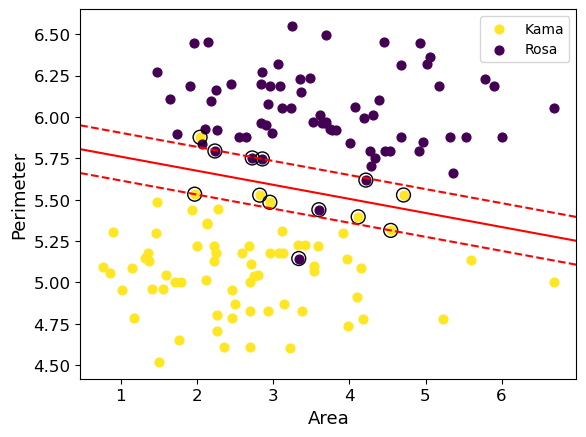

In [80]:
svm = SVC(kernel="linear", C=100, random_state=1936)
svm.fit(examined_features.values, label.values)

graph_decision_boundary(examined_features, label, svm, True)

**Spotlights** 

- The support vector machine (SVM) model demonstrates a significantly enhanced capability in generalizing the data and effectively distinguishing between the classes.
- The continuous red line represents the boundary for making decisions.
- The dotted red lines indicate the margins of the support vectors.
- The data points enclosed in circles are identified as the support vectors.

### Lower the Regularization Penalty to Relax the Margin

The earlier SVM model appeared to perform better than logistic regression; however, the narrow margins suggest that the presence of one or more outliers could result in overfitting. To address this, another model with a significantly lower regularization penalty will be created, which will result in softer margins.

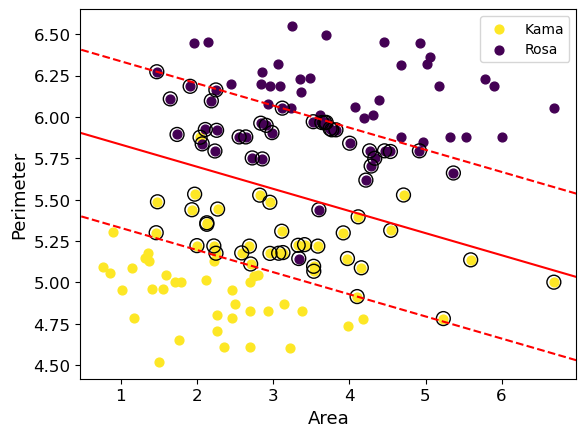

In [81]:
svm = SVC(kernel="linear", C=0.1, random_state=1936)
svm.fit(examined_features.values, label.values)

graph_decision_boundary(examined_features.values, label.values, svm, True)

**Spotlights** 

The margins have significantly expanded, allowing for more data examples to fit within them. While this change might not be advantageous for this specific scenario and could potentially result in underfitting, it effectively illustrates how adjusting the margins of an SVM model can influence its classification outcomes. Subsequent steps involve searching for the optimal C value while the model is trained on the entire dataset.

### Divide the Datasets into Training and Testing Sets.

In [82]:
"""Create the label for the target columns."""

outcome = ["target"]

"""Create a list of the training columns."""
predictors = [
        "Asymmetry_coefficient",
        "Compactness",
        "Width_of_kernel",
        "Length_of_kernel_groove"
]

"""Partition the training and test datasets and their labels."""
X_train, X_test, y_train, y_test = train_test_split(
    df[predictors], df[outcome], random_state=1936
)

print(
    "The datasets for training and testing, along with their corresponding labels, have been divided."
)

The datasets for training and testing, along with their corresponding labels, have been divided.


### Assess the SVM Model's Performance Using a Holdout Test Dataset.

In [83]:
svm = SVC(kernel="linear", C=100, random_state=1936)
svm.fit(X_train, np.ravel(y_train))

ypredicted = svm.predict(X_test)

accuracy = accuracy_score(y_test, ypredicted)
precision = precision_score(y_test, ypredicted, pos_label=1, average="weighted")
recall = recall_score(y_test, ypredicted, pos_label=1, average="weighted")
f1 = f1_score(y_test, ypredicted, pos_label=1, average="weighted")

print("Accuracy: {:.5f}%".format(accuracy))
print("Precision: {:.5f}%".format(precision))
print("Recall: {:.5f}%".format(recall))
print("F1: {:.5f}%".format(f1))

Accuracy: 0.88679%
Precision: 0.88747%
Recall: 0.88679%
F1: 0.88535%


**Spotlights** 

- The preliminary model demonstrates a notable accuracy rate of 89%.
- While it is possible to assess the model with standard metrics like precision, recall, and F1 score, accuracy is likely sufficient for this straightforward dataset.

#### Modify the SVM Model Through Grid Search and Cross-Validation Techniques.

- This code conducts a grid search to find the optimal hyperparameters for an SVM model.
- In line 1, the model is set to use a default gamma value of 'auto', which is calculated as 1 divided by the number of features.
- Line 5 outlines that the grid search will evaluate four different kernels to find the best fit:
    - The linear kernel is referred to as 'linear'.
    - The Gaussian radial basis function kernel is known as 'rbf'.
    - The polynomial kernel is labeled as 'poly'.
    - The sigmoid kernel is simply called 'sigmoid'.
- In line 6, the grid search will assess these kernels against a range of C values, from 0.01 (indicating very soft margins) to 100 (indicating very hard margins).
- Line 10 indicates that the grid search will focus on maximizing accuracy and will utilize five-fold cross-validation on the training dataset.
- This process ensures a thorough evaluation of the model's performance with different hyperparameter combinations.

In [84]:
svm = SVC(gamma="auto", random_state=1936)

grid = [
    {
        "kernel": ["linear", "rbf", "poly", "sigmoid"],
        "C": [0.01, 0.1, 1, 5, 10, 25, 50, 100],
    }
]

search = GridSearchCV(svm, param_grid=grid, scoring="accuracy", cv=5)
search.fit(X_train, np.ravel(y_train))

print(search.best_params_)

{'C': 10, 'kernel': 'linear'}


In [85]:
"""Score using the test data"""
score = search.score(X_test, y_test)

print("Accuracy: {}%".format(score))

Accuracy: 0.8867924528301887%


**Spotlights**

- The most advantageous value for the 'C' parameter is determined to be 10.
- The preferred kernel type is identified as 'poly'.
- Regrettably, the model's accuracy was maintained at 89%, which is likely attributed to the limited size of the dataset.

#### Review the Predictions Made by the Optimized SVM Model.

In [86]:
"""Test set evaluation"""

comparisons = X_test.copy()
predicted = search.predict(X_test)
comparisons["Seed - Predicted"] = predicted
comparisons["Seed - Actual"] = y_test.copy()

"""Map labels to seed names."""
encodes = {1: "Kama", 2: "Rosa", 3: "Canadian"}

comparisons["Seed - Predicted"] = comparisons["Seed - Predicted"].map(encodes)
comparisons["Seed - Actual"] = comparisons["Seed - Actual"].map(encodes)

"""Examine comparison between the predicted and the actual"""
comparisons.head(34)

,Asymmetry_coefficient,Compactness,Width_of_kernel,Length_of_kernel_groove,Seed - Predicted,Seed - Actual
43,4.711,0.8820,3.396,5.528,Rosa,Kama
136,3.526,0.8785,3.574,5.971,Rosa,Rosa
200,5.472,0.8609,2.989,5.045,Canadian,Canadian
45,1.560,0.8794,3.155,4.961,Kama,Kama
121,3.619,0.8772,3.563,6.011,Rosa,Rosa
157,4.825,0.8081,2.745,5.220,Canadian,Canadian
140,5.304,0.8480,2.994,5.395,Canadian,Canadian
7,2.700,0.8911,3.302,5.000,Kama,Kama
10,4.543,0.8696,3.242,5.314,Kama,Kama
190,5.398,0.8390,2.717,5.045,Canadian,Canadian


**Spotlights** 

Among the first 34 records, there are four occurrences of misclassification. This seems to corroborate the accuracy that was recently emphasized. Such findings reinforce the credibility of the model's performance as previously noted.